In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#res=resolution
res=1000

x=np.linspace(-2,2,res)
y=np.linspace(-2,2,res)

In [3]:
#empty array
c=np.zeros([res,res], dtype=np.complex128)

In [4]:
X,Y=np.meshgrid(x,y,indexing='ij')

In [5]:
c= X + 1j*Y

In [6]:
def iterate(c, z0=0, max_iter=20):
    """iterates z equation below
    
    Input:
    c - equation for complex plane, c= x + iy
    z0 - initial z
    max_iter - maximum iteration
    
    Arrays:
    escape_iter - number of iterations it takes to become unbound
    div - c coordinates for diverging z
    bound - c coordinates for bound z
    """
    it=0
    z=z0
    escape_iter=np.zeros([c.shape[0],c.shape[1]])
    for it in range(max_iter):
        it+=1
        z= z*z + c
        r = np.abs(z)
        for i in range(c.shape[0]):
            for j in range(c.shape[1]): 
                if (escape_iter[i,j] == 0) & (r[i,j] > 10):
                    escape_iter[i,j]=it
    return escape_iter
                

In [7]:
z0=0

sol=iterate(c, z0, 20)
print("sol=",sol)

/tmp/ipykernel_673799/3455311592.py:19: RuntimeWarning: overflow encountered in multiply
  z= z*z + c
/tmp/ipykernel_673799/3455311592.py:19: RuntimeWarning: invalid value encountered in multiply
  z= z*z + c
/tmp/ipykernel_673799/3455311592.py:20: RuntimeWarning: overflow encountered in absolute
  r = np.abs(z)


sol= [[3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


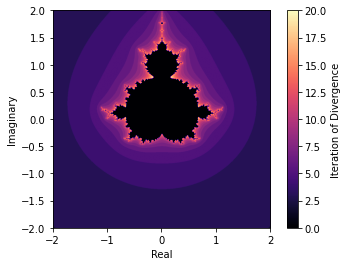

In [8]:
#image 2:
plt.imshow(sol, cmap='magma', origin='upper', extent=[-2,2,-2,2])

plt.xlabel("Real")
plt.ylabel("Imaginary")

cbar= plt.colorbar()
#should be horizontal
#should be -2~2

#axes labels
#number of pixels?

cbar.set_label('Iteration of Divergence',)
plt.savefig("Q1_2.pdf", format="pdf")

In [9]:
bound=np.where(sol<20)
div=np.where(sol>=20)
print(bound,div)

(array([  0,   0,   0, ..., 999, 999, 999]), array([  0,   1,   2, ..., 997, 998, 999])) (array([ 57,  57,  58, ..., 613, 614, 614]), array([497, 502, 496, ..., 587, 418, 581]))


In [10]:
sol[bound]=1.0
sol[div]=0.0

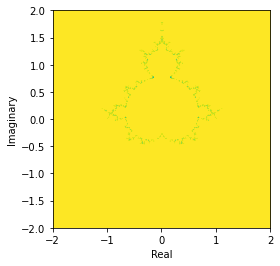

In [11]:
#image 1:
plt.imshow(sol, cmap='viridis', extent=[-2,2,-2,2])
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.savefig("Q1_1.pdf", format="pdf")